# Feature classifier - Gabbar

## Step 1. Prepare problem

#### 1a. Load libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

In [3]:
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

In [4]:
path = '../downloads/old-feature-classifier/'

#### 1b. Load dataset

In [5]:
# Loading the training dataset.
training = pd.read_csv(path + 'training.csv')

In [6]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(training.shape))
training = training.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(training.shape))

Shape before dropping duplicates: (6025, 115)
Shape after dropping duplicates: (5292, 115)


In [7]:
# Creating a smaller sample to speed up workflow.
# training = training[:1000]

In [8]:
training.head()

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,changeset_comment_special_characters_count,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,feature_similar_tags_count,feature_name_naughty_words_count_old,feature_primary_tags_old,feature_area_old,feature_property_tags_old,feature_name_translations_count_old,feature_has_website_old,feature_has_wikidata_old,feature_has_wikipedia_old,feature_similar_tags_count_old,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway,aerialway_old,aeroway_old,amenity_old,barrier_old,boundary_old,building_old,craft_old,emergency_old,geological_old,highway_old,historic_old,landuse_old,leisure_old,man_made_old,military_old,natural_old,office_old,place_old,power_old,public_transport_old,railway_old,route_old,shop_old,sport_old,tourism_old,waterway_old,tag_values_popularity_min,tag_values_popularity_max,tag_values_popularity_mean,tag_values_popularity_stddev
0,47303446,0.0,0,1,0,0,0,8,0,0,0,0,0,0,4111,21128,559,6,2,0,0,4111,21128,559,6,2,4,0,3,2,0.00e+00,5,1,0,0,0,1,0,0,1,0,0,2,0.00e+00,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,50.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,50.83,0.0,0.0,0.0,0.0,0.0,0.0,1.64e-02,5.08e-01,2.62e-01,0.25
1,47867864,0.0,0,1,0,1,0,18,0,1091029462,0,5,0,0,21,332,4,0,0,0,1,3159,109381,260,0,0,5,0,505,1,5.52e+09,4,1,0,0,0,3,0,0,3,0,0,0,5.52e+09,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.96,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.90e-01,2.90e-01,2.90e-01,0.00
2,48007382,1.0,0,1,0,1,0,3,0,0,0,0,0,0,5,9,3,0,1,0,0,3343,958829,577,1,3,22,0,26,1,0.00e+00,16,8,0,1,1,0,1,0,1,0,0,1,0.00e+00,16,8,0,1,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.43,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.30e-03,4.30e-03,4.30e-03,0.00
3,48971499,1.0,0,1,0,1,0,35,0,0,0,7,0,0,1,1,1,0,0,0,0,556,18379,96,2,2,4,0,49,1,0.00e+00,5,1,0,1,1,1,1,0,2,0,0,1,0.00e+00,4,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.21,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.21,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.21e-02,2.21e-02,2.21e-02,0.00
4,47412284,0.0,0,1,0,1,0,3,0,448,0,0,0,0,30,339,6,0,1,0,0,30,339,6,0,1,2,0,0,1,0.00e+00,1,0,0,0,0,1,0,0,1,0,0,0,0.00e+00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.55,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0

## 2. Summarize data

#### 2a. Descriptive statistics

In [9]:
print('Shape: {}'.format(training.shape))

Shape: (5292, 115)


In [10]:
training.dtypes.head()

changeset_id                     int64
changeset_harmful              float64
changeset_features_created       int64
changeset_features_modified      int64
changeset_features_deleted       int64
dtype: object

In [11]:
training.describe()

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,changeset_comment_special_characters_count,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,feature_similar_tags_count,feature_name_naughty_words_count_old,feature_primary_tags_old,feature_area_old,feature_property_tags_old,feature_name_translations_count_old,feature_has_website_old,feature_has_wikidata_old,feature_has_wikipedia_old,feature_similar_tags_count_old,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway,aerialway_old,aeroway_old,amenity_old,barrier_old,boundary_old,building_old,craft_old,emergency_old,geological_old,highway_old,historic_old,landuse_old,leisure_old,man_made_old,military_old,natural_old,office_old,place_old,power_old,public_transport_old,railway_old,route_old,shop_old,sport_old,tourism_old,waterway_old,tag_values_popularity_min,tag_values_popularity_max,tag_values_popularity_mean,tag_values_popularity_stddev
count,5.29e+03,5292.00,5292.0,5292.0,5292.0,5292.00,5292.00,5292.00,5.29e+03,5.29e+03,5.29e+03,5292.00,5.29e+03,5292.00,5292.00,5.29e+03,5292.00,5292.00,5292.00,5.29e+03,5292.00,5292.00,5.29e+03,5292.00,5292.00,5292.00,5292.00,5.29e+03,5292.00,5292.00,5.29e+03,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5.29e+03,5292.00,5.29e+03,5292.00,5292.00,5292.00,5292.00,5292.0,5.29e+03,5292.00,5292.00,5292.00,5292.00,5292.0,5.29e+03,5.29e+03,5.29e+03,5292.0,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5.29e+03,5292.00,5292.0,5292.00,5292.00,5292.00,5292.00,5292.00,5.29e+03,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5.29e+03,5292.00,5292.0,5292.00,5292.00,5292.00,5292.00,5292.00,5.29e+03,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00,5292.00
mean,4.73e+07,0.08,0.0,1.0,0.0,0.51,0.31,4.24,1.32e-03,3.06e+10,7.56e-04,0.82,3.78e-04,0.39,4523.09,2.72e+05,262.35,25.98,82.37,1.51e-03,0.44,6753.36,1.36e+06,544.97,59.65,20.33,6.82,4.54e-03,591.23,1.17,2.68e+10,7.21,2.13,0.11,0.09,0.11,1.50,0.37,0.22,2.09,0.01,2.46e-03,1.10,2.66e+10,5.93,1.74,0.07,0.08,0.1,6.80e-03,0.51,0.14,0.10,0.02,0.0,7.18e-03,6.24e-03,3.78e-04,0.0,0.01,0.02,0.65,0.10,0.58,9.32,6.76e-03,0.07,0.0,4.91,0.11,0.24,1.55,0.02,1.15e-03,0.72,0.10,0.39,0.02,0.27,0.15,0.21,0.32,0.12,0.37,0.11,0.01,0.02,0.60,0.09,0.58,10.12,6.39e-03,0.07,0.0,4.90,0.10,0.21,1.07,0.02,6.16e-04,0.75,0.08,0.40,0.01,0.27,0.08,0.21,0.31,0.09,0.34,0.09,0.13,0.20,0.16,0.03
std,7.83e+05,0.28,0.0,0.0,0.0,0.50,0.46,5.27,3.63e-02,1.30e+12,2.75e-02,2.43,1.94e-02,0.99,14750.24,1.20e+06,484.76,152.62,466.72,3.89e-02,1.05,21139.81,7.42e+06,656.75,409.72,189.89,18.74,7.26e-02,734.95,0.42,1.07e+12,9.55,8.21,0.32,0.29,0.32,3.41,0.66,0.93,3.54,0.18,5.32e-02,0.44,1.07e+12,9.02,7.50,0.26,0.27,0.3,1.16e-01,0.50,0.

In [12]:
training.groupby('changeset_harmful').size()

changeset_harmful
0.0    4855
1.0     437
dtype: int64

In [13]:
training.corr(method='pearson').head()

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,changeset_comment_special_characters_count,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,feature_similar_tags_count,feature_name_naughty_words_count_old,feature_primary_tags_old,feature_area_old,feature_property_tags_old,feature_name_translations_count_old,feature_has_website_old,feature_has_wikidata_old,feature_has_wikipedia_old,feature_similar_tags_count_old,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway,aerialway_old,aeroway_old,amenity_old,barrier_old,boundary_old,building_old,craft_old,emergency_old,geological_old,highway_old,historic_old,landuse_old,leisure_old,man_made_old,military_old,natural_old,office_old,place_old,power_old,public_transport_old,railway_old,route_old,shop_old,sport_old,tourism_old,waterway_old,tag_values_popularity_min,tag_values_popularity_max,tag_values_popularity_mean,tag_values_popularity_stddev
changeset_id,1.00,-0.17,NaN,NaN,NaN,-0.06,0.11,0.07,2.07e-02,-9.83e-03,4.93e-03,0.02,-1.58e-02,0.07,-0.04,0.03,-0.02,-0.02,-0.52,8.16e-03,0.04,0.01,0.04,0.02,1.99e-02,-0.20,0.05,0.03,-0.04,9.62e-03,-0.01,0.10,1.02e-01,-0.07,0.17,0.16,0.07,3.09e-02,0.07,0.09,0.05,0.01,-0.02,-0.01,0.09,8.12e-02,-0.02,0.17,0.15,0.01,-0.05,-6.04e-03,-3.01e-03,-1.36e-03,NaN,-0.03,-0.04,1.06e-02,NaN,2.97e-02,-0.02,-0.07,-1.37e-02,-2.76e-03,-0.06,-0.01,8.04e-03,NaN,-0.15,-7.89e-03,0.08,0.16,-0.03,1.83e-03,0.03,-8.27e-03,0.10,2.36e-02,-5.68e-02,-3.33e-03,-0.04,-0.03,0.02,-0.04,0.01,2.97e-02,-1.59e-02,-0.06,-1.14e-02,3.60e-03,-0.05,-8.53e-03,8.08e-03,NaN,-0.15,-3.95e-03,0.05,0.08,-0.03,7.93e-03,0.05,1.52e-02,0.10,1.66e-02,-6.02e-02,-8.81e-03,-0.04,-0.04,0.02,-0.04,8.52e-03,-0.07,-0.09,-0.09,-0.04
changeset_harmful,-0.17,1.00,NaN,NaN,NaN,0.22,-0.18,-0.02,7.97e-03,-7.06e-03,1.67e-02,-0.05,-5.83e-03,-0.01,-0.06,-0.06,-0.14,-0.05,0.55,6.00e-03,-0.04,-0.02,-0.02,-0.08,9.43e-05,0.21,-0.01,0.06,-0.01,3.84e-02,0.02,-0.05,2.66e-03,-0.05,-0.03,-0.04,-0.03,2.17e-03,0.04,-0.01,0.14,0.04,-0.02,0.02,-0.04,1.06e-03,-0.04,-0.01,-0.02,0.08,0.22,-9.42e-02,-4.15e-02,-2.43e-02,NaN,-0.03,-0.02,-5.83e-03,NaN,-5.97e-03,-0.01,-0.04,-5.71e-03,1.92e-03,-0.03,-0.01,-7.32e-03,NaN,0.08,-2.98e-02,0.09,0.13,-0.01,-6.89e-03,0.04,-1.51e-03,0.03,-6.05e-03,-1.47e-03,-6.37e-03,-0.03,-0.05,0.05,-0.04,0.03,-5.97e-03,2.20e-03,-0.03,-3.78e-03,2.00e-03,-0.03,-1.12e-02,-6.97e-03,NaN,0.08,-2.78e-02,0.08,0.05,-0.01,-5.83e-03,0.04,-8.39e-03,0.02,-4.87e-03,-1.47e-03,5.06e-03,-0.03,-0.04,0.04,-0.03,1.18e-02,0.05,0.03,0.04,-0.01
changeset_features_created,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [14]:
skew = training.skew()
skew.sort(ascending=False)
skew.head()

power_old                        71.85
power                            61.54
changeset_bbox_area              57.87
user_name_naughty_words_count    51.42
military_old                     51.42
dtype: float64

#### 2b. Data visualizations

In [15]:
# Histograms.
# training.hist(figsize=(20, 20));

In [16]:
# Density plot.
# training.plot.density(figsize=(20, 50), subplots=True, sharex=False);

In [17]:
# training.plot.box(layout=(5, 4), figsize=(20, 25), subplots=True, sharex=False, sharey=False);

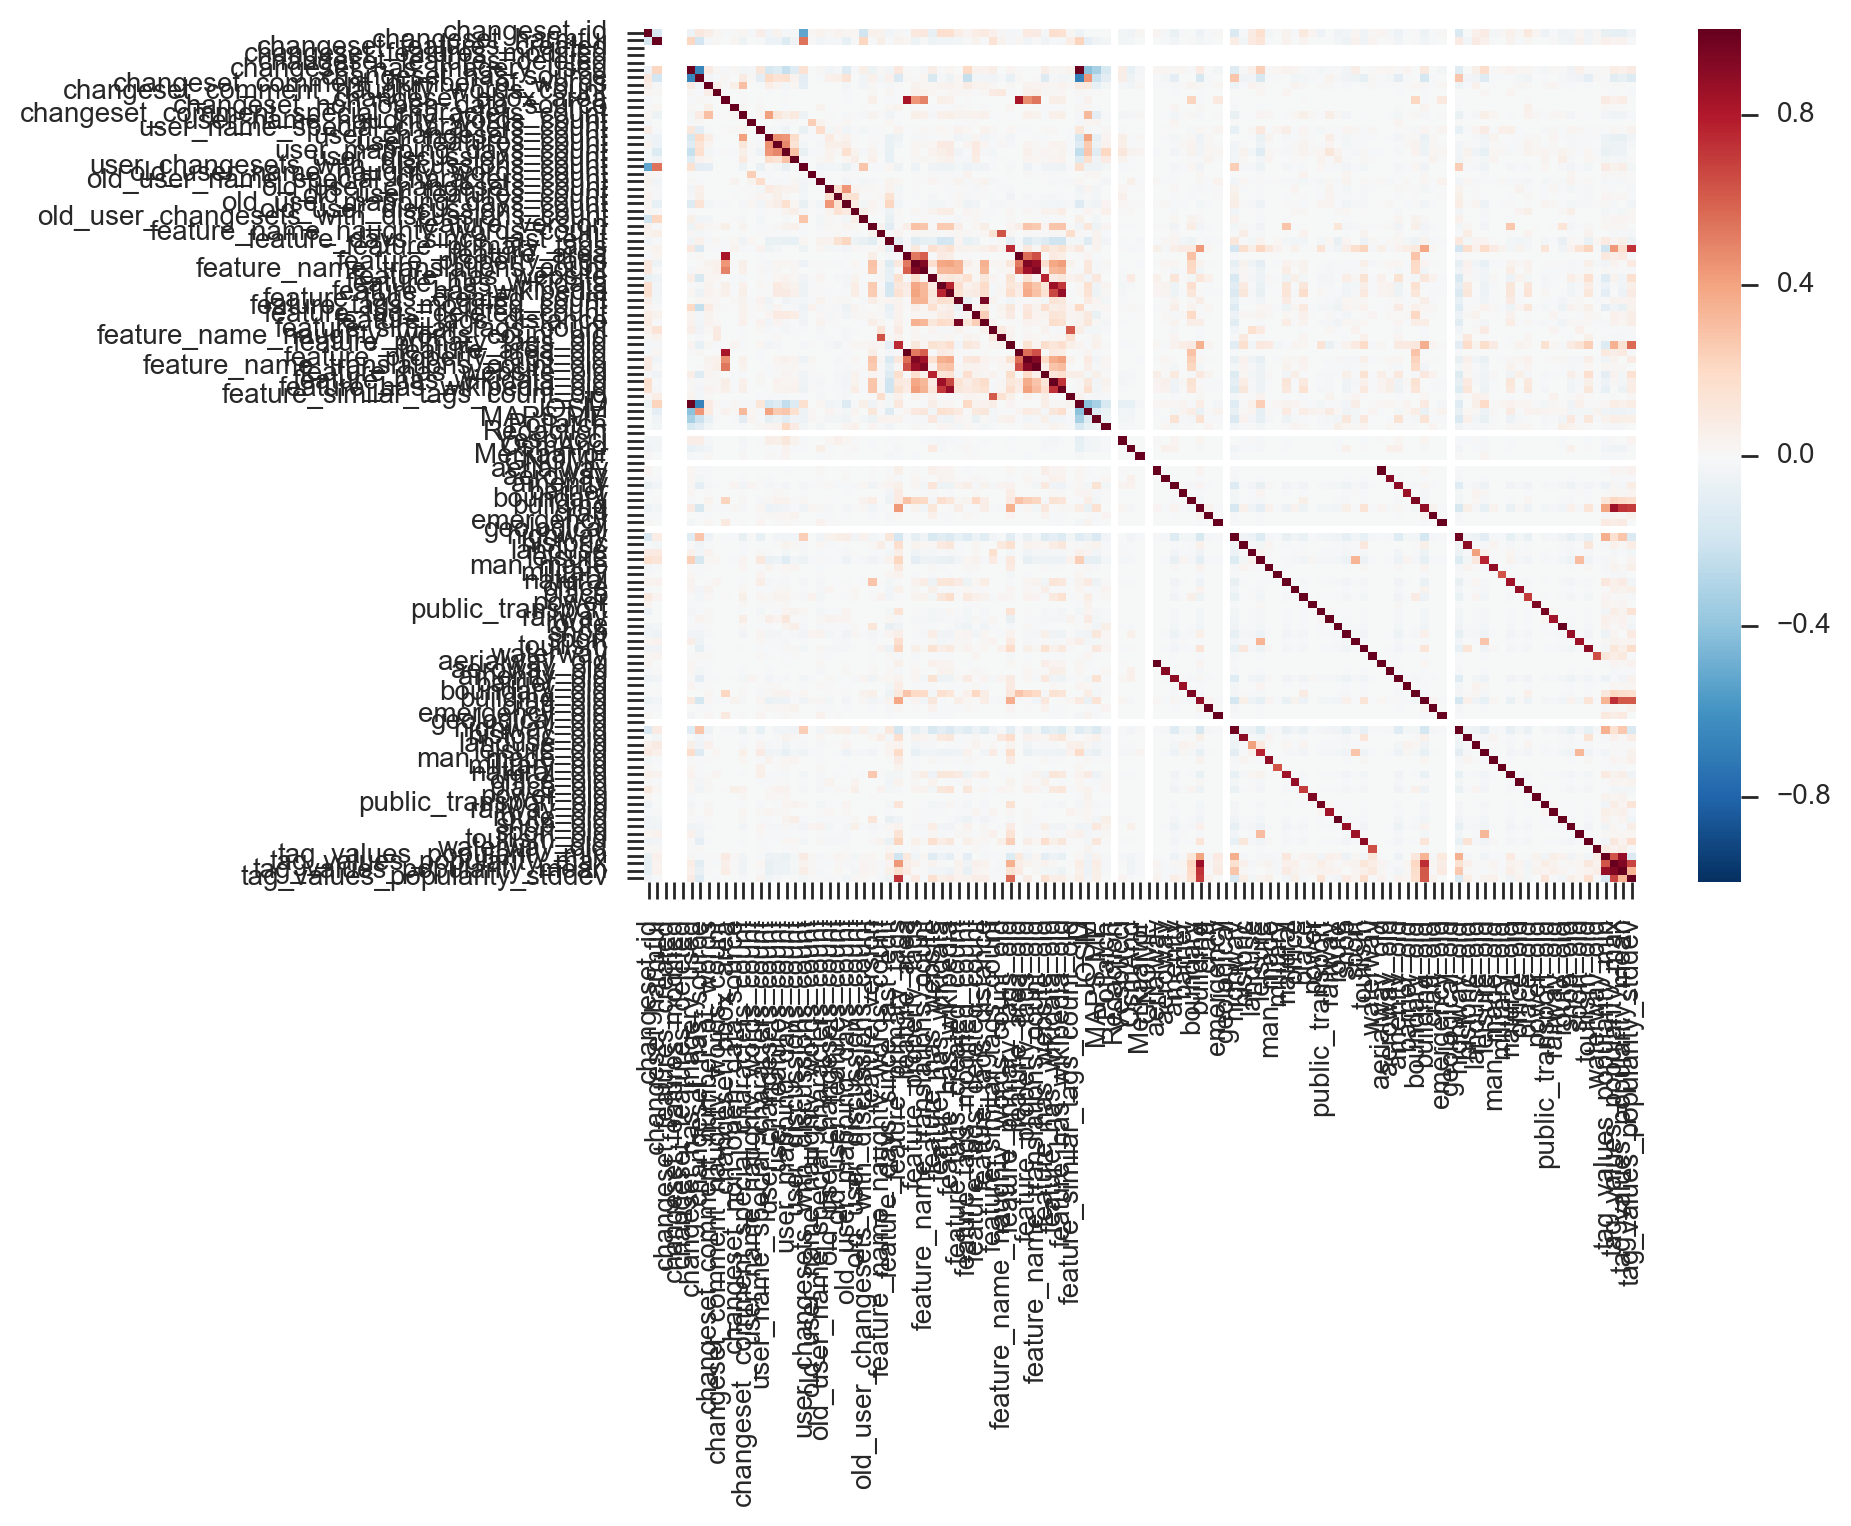

In [18]:
sns.heatmap(training.corr(method='pearson'));

## 3. Prepare data

#### 3a. Data cleaning

#### 3b. Feature selection

In [19]:
non_training_attributes = ['changeset_id', 'changeset_harmful']
X = training.drop(non_training_attributes, axis=1)
y = training['changeset_harmful']

#### 3c. Data transforms

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [21]:
# Estimate importance of all features.
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_scaled, y)

importances = pd.DataFrame(
    list(zip(X.columns, model.feature_importances_)),
    columns=['feature', 'importance']
)
importances.sort(columns='importance', ascending=False).head()

,feature,importance
16,user_changesets_with_discussions_count,0.22
23,old_user_changesets_with_discussions_count,0.04
12,user_changesets_count,0.03
26,feature_days_since_last_edit,0.03
14,user_mapping_days_count,0.02


## 4. Evaluate algorithms

#### 4a. Split-out validation dataset
- We have a seperate validation dataset. Yay!

#### 4b. Spot Check Algorithms
- Running algorithms in a loop below.

#### 4c. Compare Algorithms

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

results = []
names = []
for (name, model) in models:
    kfold = KFold(n_splits=2, random_state=7)
    result = cross_val_score(model, X_scaled, y, cv=kfold, scoring='roc_auc')
    results.append(result)
    names.append(name)
    
    print('{}: {} ({})'.format(name, round(result.mean(), 2), round(result.std(), 2)))

LR: 0.83 (0.02)
CART: 0.72 (0.02)
KNN: 0.77 (0.04)
SVM: 0.84 (0.04)
RFC: 0.84 (0.02)
GBC: 0.91 (0.02)


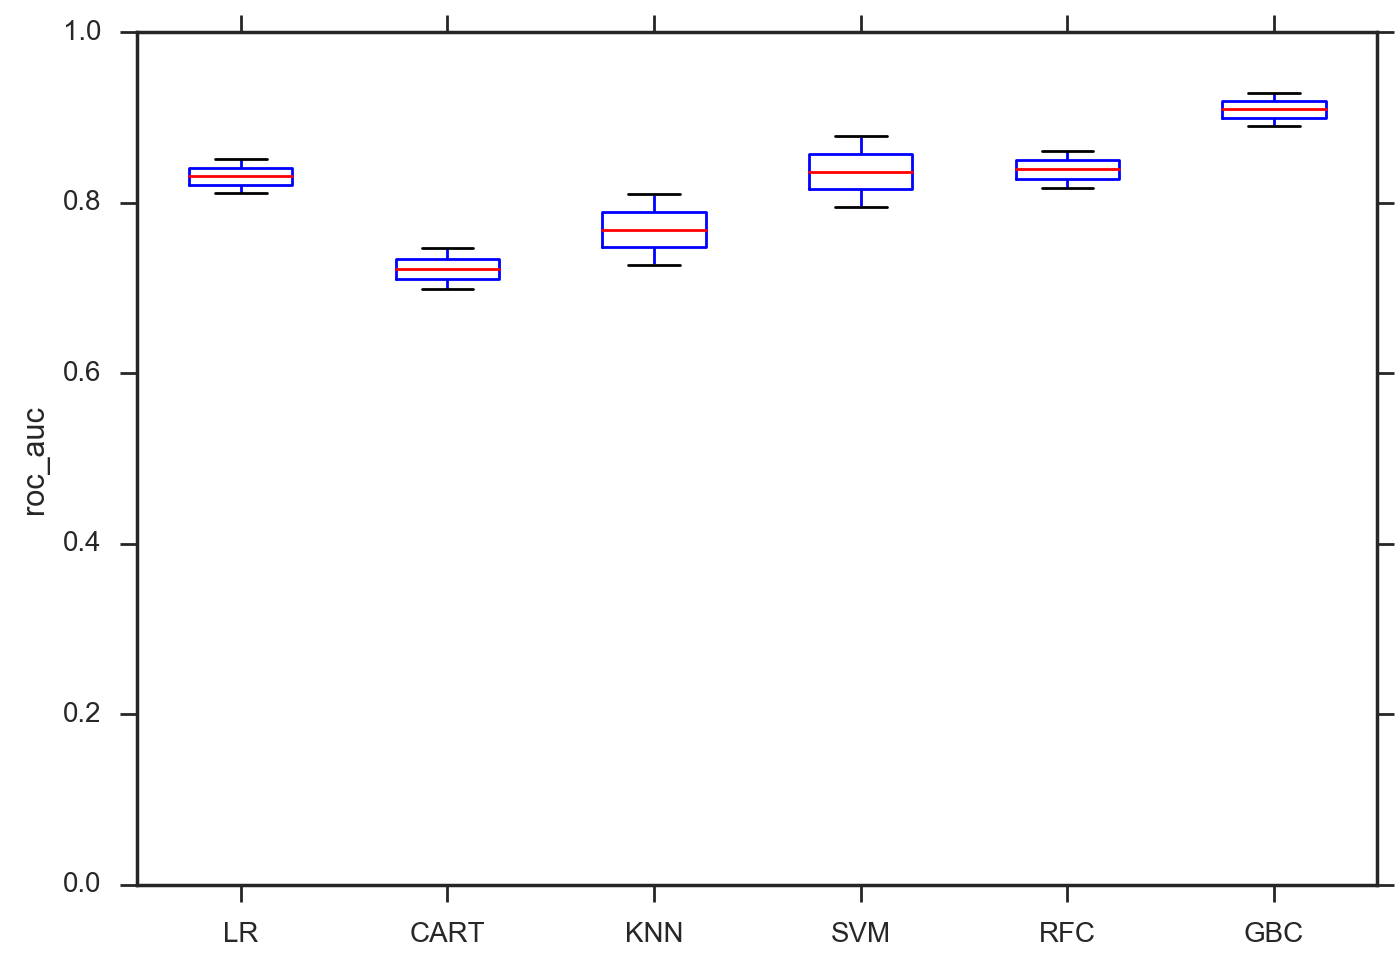

In [23]:
# NOTE: Temporarily turning off the graph.
fig, ax = plt.subplots(1, 1)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('roc_auc')
ax.set_ylim((0, 1));

## 5. Improve Accuracy

#### 5a. Algorithm Tuning

In [24]:
harmful_count = training[training['changeset_harmful'] == True].shape[0]
not_harmful_count = training[training['changeset_harmful'] == False].shape[0]

# Making this a float to prevent truncation due to integer division.
count = 1.0 * (harmful_count + not_harmful_count)

# Calculate sample weights based on number of occourances.
sample_weight = [count if l else 1 for l in y]

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1,  0.5],
    'max_features': ['log2'],
    'random_state': [5],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, fit_params={'sample_weight': sample_weight})
grid.fit(X_scaled, y)

print('Best score: {}'.format(grid.best_score_))
print('Best params: {}'.format(grid.best_params_))

Best score: 0.9036281179138322
Best params: {'n_estimators': 700, 'max_depth': 7, 'random_state': 5, 'max_features': 'log2', 'learning_rate': 0.5}


In [26]:
model = grid.best_estimator_
y_model = model.predict(X_scaled)

#### 5b. Test options and evaluation metric

In [27]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y, y_model)

matrix = pd.DataFrame(matrix, index=['Labelled good', 'Labelled harmful'], columns=['Predicted good', 'Predicted harmful'])
matrix

,Predicted good,Predicted harmful
Labelled good,4850,5
Labelled harmful,0,437


In [28]:
total = matrix.sum().sum()
matrix / total

,Predicted good,Predicted harmful
Labelled good,0.92,9.45e-04
Labelled harmful,0.00,8.26e-02


In [29]:
from sklearn.metrics import classification_report

report = classification_report(y, y_model)
print(report)

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      4855
        1.0       0.99      1.00      0.99       437

avg / total       1.00      1.00      1.00      5292



In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='roc_auc')

# An area of 0.5 represents a model that is as good as random.
# An area of 1.0 represents a model that made all predictions perfectly.
print('Scores: {} ({})'.format(round(scores.mean(), 2), round(scores.std(), 2)))

Scores: 0.88 (0.02)


#### 5c. Ensembles
- Todo

## 6. Finalize model

#### 6a. Predictions on validation dataset

In [31]:
validation = pd.read_csv(path + 'validation.csv')
validation.head()

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,changeset_comment_special_characters_count,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,feature_similar_tags_count,feature_name_naughty_words_count_old,feature_primary_tags_old,feature_area_old,feature_property_tags_old,feature_name_translations_count_old,feature_has_website_old,feature_has_wikidata_old,feature_has_wikipedia_old,feature_similar_tags_count_old,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway,aerialway_old,aeroway_old,amenity_old,barrier_old,boundary_old,building_old,craft_old,emergency_old,geological_old,highway_old,historic_old,landuse_old,leisure_old,man_made_old,military_old,natural_old,office_old,place_old,power_old,public_transport_old,railway_old,route_old,shop_old,sport_old,tourism_old,waterway_old,tag_values_popularity_min,tag_values_popularity_max,tag_values_popularity_mean,tag_values_popularity_stddev
0,46458207,0.0,0,1,0,0,0,25,0,0,0,5,0,0,6164,240741,110,83,33,0,0,44935,1616972,2171,17,1,3,0,604,1,0.0,5,1,1,1,1,1,1,0,2,0,0,1,0.0,4,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,9.52,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,9.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.52e-02,9.52e-02,9.52e-02,0.0
1,48166724,0.0,0,1,0,1,0,7,0,223014,0,3,0,0,1,1,1,0,0,0,3,35614,12926795,1562,46,187,3,0,639,1,322570.0,2,1,0,0,0,0,1,0,1,0,0,1,322570.0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,20.64,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,20.64,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.06e-01,2.06e-01,2.06e-01,0.0
2,47500384,0.0,0,1,0,0,0,10,0,0,0,1,0,3,1759,244245,627,45,2,0,1,1667,1827,159,20,7,3,0,2,1,0.0,4,1,1,0,0,1,0,0,1,0,0,0,0.0,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.60e-03,4.60e-03,4.60e-03,0.0
3,48646312,0.0,0,1,0,1,0,1,0,1019522,0,0,0,0,10,183,1,0,1,0,2,541,180693,314,1,0,22,0,1215,1,339127.0,1,0,0,0,0,1,0,1,2,0,0,1,339127.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,16.57,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,15.62,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.66e-01,1.66e-01,1.66e-01,0.0
4,47489162,0.0,0,1,0,0,1,3,0,685,0,0,0,0,571,16006,97,0,0,0,0,571,16006,97,0,0,2,0,1022,1,0.0,7,1,0,0,0,1,0,0,1,0,0,1,0.0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.81,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [32]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(validation.shape))
validation = validation.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(validation.shape))

Shape before dropping duplicates: (2583, 115)
Shape after dropping duplicates: (2439, 115)


In [33]:
validation.groupby('changeset_harmful').size()

changeset_harmful
0.0    2230
1.0     209
dtype: int64

In [34]:
# TODO: Replace with a pipeline
vX = validation.drop(non_training_attributes, axis=1)
vX_scaled = scaler.transform(vX)

vy = validation['changeset_harmful']

In [35]:
vy_model = model.predict(vX_scaled)

In [36]:
validation['prediction'] = model.predict(vX_scaled)
validation.to_csv(path + 'validation-review.csv', index=False)

In [37]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(vy, vy_model)
matrix = pd.DataFrame(matrix, index=['Labelled good', 'Labelled harmful'], columns=['Predicted good', 'Predicted harmful'])
matrix

,Predicted good,Predicted harmful
Labelled good,2159,71
Labelled harmful,43,166


In [38]:
from sklearn.metrics import classification_report

report = classification_report(vy, vy_model)
print(report)

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.97      2230
        1.0       0.70      0.79      0.74       209

avg / total       0.96      0.95      0.95      2439



In [39]:
scores = cross_val_score(model, vX_scaled, vy, cv=kfold, scoring='roc_auc')
print('Scores: {} ({})'.format(round(scores.mean(), 2), round(scores.std(), 2)))

Scores: 0.84 (0.01)


#### 6b. Create standalone model on entire training dataset
- Todo

#### 6c. Predictions on testing dataset

In [40]:
testing = pd.read_csv(path + 'testing.csv')
testing.head()

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,changeset_comment_special_characters_count,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,feature_similar_tags_count,feature_name_naughty_words_count_old,feature_primary_tags_old,feature_area_old,feature_property_tags_old,feature_name_translations_count_old,feature_has_website_old,feature_has_wikidata_old,feature_has_wikipedia_old,feature_similar_tags_count_old,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway,aerialway_old,aeroway_old,amenity_old,barrier_old,boundary_old,building_old,craft_old,emergency_old,geological_old,highway_old,historic_old,landuse_old,leisure_old,man_made_old,military_old,natural_old,office_old,place_old,power_old,public_transport_old,railway_old,route_old,shop_old,sport_old,tourism_old,waterway_old,tag_values_popularity_min,tag_values_popularity_max,tag_values_popularity_mean,tag_values_popularity_stddev
0,48312494,NaN,0,1,0,0,1,2,0,0,0,2,0,0,1396,27158,216,2,0,0,0,2398,1172651,1167,0,1,6,0,979,1,0.0,19,2,0,1,0,1,0,0,1,0,0,1,0.0,18,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.0
1,48308033,NaN,0,1,0,1,0,9,0,0,0,2,0,0,1902,2774,134,9,5,0,0,1902,2774,134,9,5,3,0,63,1,0.0,12,1,1,0,0,3,1,0,4,0,0,1,0.0,9,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,19.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.20,0.20,0.0
2,48443295,NaN,0,1,0,1,0,5,0,476,0,1,0,4,438,16082,27,0,4,0,0,6890,1179843,891,55,15,2,0,1012,1,0.0,4,1,0,0,0,2,1,0,3,0,0,1,0.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.04,0.0
3,48396287,NaN,0,1,0,1,0,6,0,626193,0,0,0,0,7979,489804,897,175,26,0,2,138,1191,13,0,1,9,1,-21,1,0.0,6,1,0,0,0,0,1,0,1,0,0,1,0.0,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.03,0.0
4,48369421,NaN,0,1,0,0,1,3,0,43,0,1,0,0,3539,7322752,493,9,4,0,0,3539,7322752,493,9,4,2,0,0,2,22.0,4,0,0,0,0,1,1,0,2,0,0,1,22.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,81.02,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.51,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [41]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(testing.shape))
testing = testing.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(testing.shape))

Shape before dropping duplicates: (19999, 115)
Shape after dropping duplicates: (19793, 115)


In [42]:
training_attributes = list(set(testing.columns) - set(non_training_attributes))
testing = testing.dropna(subset=training_attributes)
print('After samples rows with null: {}'.format(testing.shape))

After samples rows with null: (19788, 115)


In [43]:
# TODO: Replace with a pipeline
tX = testing.drop(non_training_attributes, axis=1)
tX_scaled = scaler.transform(tX)
# ty = testing['changeset_harmful']

In [44]:
testing['prediction'] = model.predict(tX_scaled)

In [45]:
tharmful_count = testing[testing['prediction'] == True].shape[0]
tnot_harmful_count = testing[testing['prediction'] == False].shape[0]

print('Predicted good: {}'.format(tnot_harmful_count))
print('Predicted harmful: {}'.format(tharmful_count))

print('Percentage harmful: {}%'.format(round(100.0 * tharmful_count / testing.shape[0], 2)))

Predicted good: 19062
Predicted harmful: 726
Percentage harmful: 3.67%


In [46]:
testing.to_csv(path + 'testing-review.csv', index=False)

#### 6d. Save model for later use

In [47]:
from sklearn.externals import joblib

model_path = '../gabbar/trained/model.pkl'
joblib.dump(model, model_path)

['../gabbar/trained/model.pkl']